In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 
import numpy as np
import os
from tensorflow import keras
import imghdr#Recognize image file formats based on their first few bytes.

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [14]:
data_dir='data'
img_types=["jpg","jpeg","bmp","png"]

for img_class in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir,img_class)):
        img_path=os.path.join(data_dir,img_class,img)
        tip=imghdr.what(img_path)
        #img_data=cv2.imread(img_path)
        if tip not in img_types:
            print('img not need{}'.format(img_path))
            os.remove(img_path)
            

img not needdata\happy\depositphotos_317939792-stock-photo-young-woman-isolated-yellow-background.jpg
img not needdata\happy\depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
img not needdata\happy\depositphotos_53010223-stock-photo-free-happy-girl-on-beach.jpg
img not needdata\happy\freestock_24044983.jpg
img not needdata\happy\group-happy-people-isolated-over-600w-102307264.jpg
img not needdata\happy\Happy20People.jpg
img not needdata\happy\m-black-man-you-excited-young-man-in-colorful-hoodie66282d8d9e5385.06796293.webp
img not needdata\happy\portrait-young-father-carrying-his-260nw-736997836.jpg
img not needdata\happy\smiling-woman_W6GFOSFAXA.jpg
img not needdata\sad\depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
img not needdata\sad\group-stressful-university-students-waiting-260nw-481536121.jpg
img not needdata\sad\portrait-man-sad-mood-people-260nw-1023588343.jpg
img not needdata\sad\portrait-old-woman-counting-money-260nw-1337823635.jpg


In [15]:
dataset=tf.keras.utils.image_dataset_from_directory(
    'data'
)


Found 601 files belonging to 2 classes.


In [25]:
dataset.__dict__
len(dataset)

19

In [27]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [28]:
data_iter=dataset.as_numpy_iterator()
batch=data_iter.next()

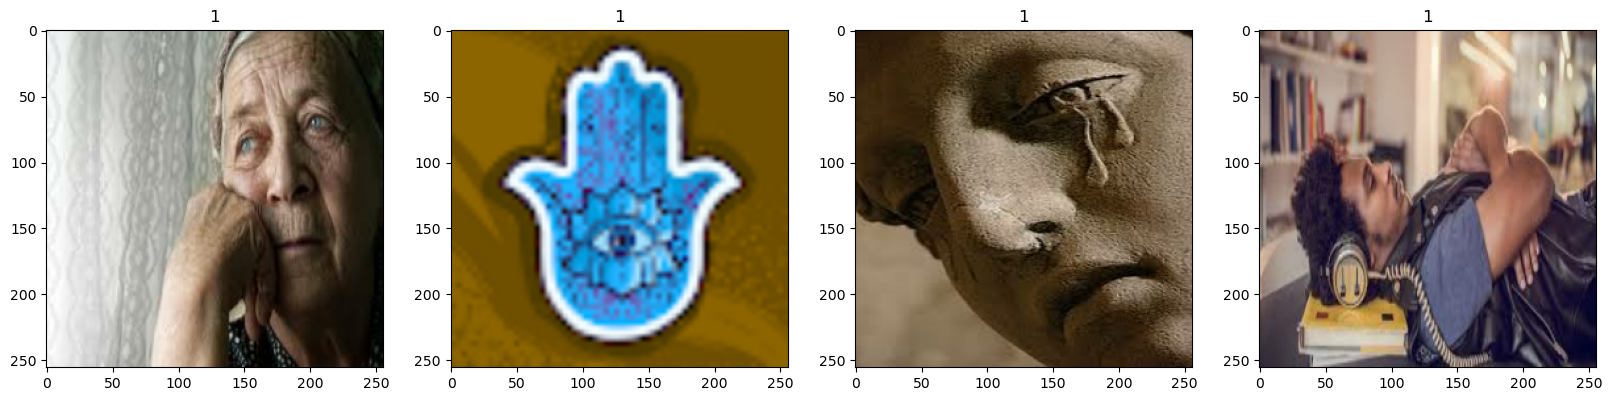

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    '''The enumerate object yields pairs containing a count (from start, which
defaults to zero) and a value yielded by the iterable argument.

enumerate is useful for obtaining an indexed list:
    (0, seq[0]), (1, seq[1]), (2, seq[2]), ...'''

In [32]:
x,y=batch
x.shape

(32, 256, 256, 3)

0


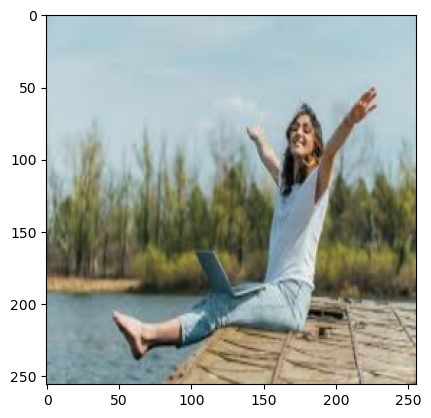

In [102]:
plt.imshow(x[19].astype(int))
print(y[19])

In [33]:
y.shape

(32,)

In [34]:
x

array([[[[226.66602   , 230.66602   , 231.66602   ],
         [218.22266   , 222.22266   , 223.22266   ],
         [222.96875   , 226.96875   , 227.96875   ],
         ...,
         [ 76.94922   ,  85.94922   ,  65.32031   ],
         [ 81.333984  ,  91.22266   ,  67.55664   ],
         [ 76.18555   ,  86.18555   ,  62.185547  ]],

        [[229.52734   , 233.52734   , 234.52734   ],
         [220.89285   , 224.89285   , 225.89285   ],
         [223.68855   , 227.68855   , 228.68855   ],
         ...,
         [ 54.82534   ,  63.82534   ,  43.196434  ],
         [ 62.38439   ,  72.27306   ,  48.607048  ],
         [ 66.689514  ,  76.689514  ,  52.689514  ]],

        [[233.96289   , 237.96289   , 238.96289   ],
         [225.08966   , 229.08966   , 230.08966   ],
         [225.23593   , 229.23593   , 230.23593   ],
         ...,
         [ 33.5383    ,  42.5383    ,  21.909393  ],
         [ 42.7017    ,  52.59037   ,  28.924355  ],
         [ 54.413174  ,  64.41318   ,  40.413174  ]],

<h2>Split Data</h2>

In [35]:
train_size=int(len(dataset)*0.8)
val_size=int(len(dataset)*0.1)
test_size=int(len(dataset)*0.1)

In [36]:
print(train_size, test_size, val_size)

15 1 1


In [56]:
train_ds=dataset.take(train_size)
val_ds=dataset.skip(train_size).take(val_size)
test_ds=dataset.skip(train_size+val_size)

In [57]:
train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [58]:
resize_and_reshape=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(256,256),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [59]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [137]:
model=tf.keras.models.Sequential([
    resize_and_reshape,
    data_augmentation,
    keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [138]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [139]:
model.build(input_shape=(32,256,256,3))


In [140]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_5 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                 

In [141]:
history=model.fit(train_ds,epochs=50,validation_data=val_ds)

Epoch 1/50
15/15 [==============================] - 8s 268ms/step - loss: 0.9698 - accuracy: 0.5146 - val_loss: 0.6879 - val_accuracy: 0.5312
Epoch 2/50
15/15 [==============================] - 5s 279ms/step - loss: 0.6818 - accuracy: 0.5708 - val_loss: 0.6783 - val_accuracy: 0.5312
Epoch 3/50
15/15 [==============================] - 4s 256ms/step - loss: 0.6185 - accuracy: 0.6521 - val_loss: 0.7835 - val_accuracy: 0.5312
Epoch 4/50
15/15 [==============================] - 5s 276ms/step - loss: 0.6255 - accuracy: 0.6562 - val_loss: 0.6115 - val_accuracy: 0.6875
Epoch 5/50
15/15 [==============================] - 5s 287ms/step - loss: 0.6072 - accuracy: 0.6917 - val_loss: 0.6608 - val_accuracy: 0.6562
Epoch 6/50
15/15 [==============================] - 5s 299ms/step - loss: 0.5725 - accuracy: 0.6938 - val_loss: 0.5271 - val_accuracy: 0.6875
Epoch 7/50
15/15 [==============================] - 4s 272ms/step - loss: 0.5823 - accuracy: 0.6917 - val_loss: 0.4293 - val_accuracy: 0.8438
Epoch 

In [142]:
accuracy=history.history['accuracy']
loss=history.history['loss']

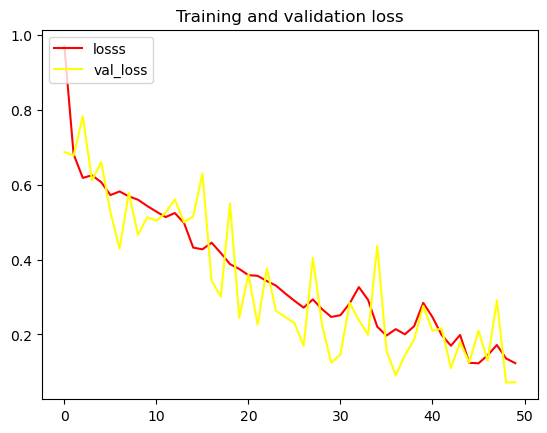

In [143]:
plt.plot(history.history['loss'],color='red',label="losss")
plt.plot(history.history['val_loss'],color="yellow",label="val_loss")
plt.title('Training and validation loss')
plt.legend(loc="upper left")
plt.show()

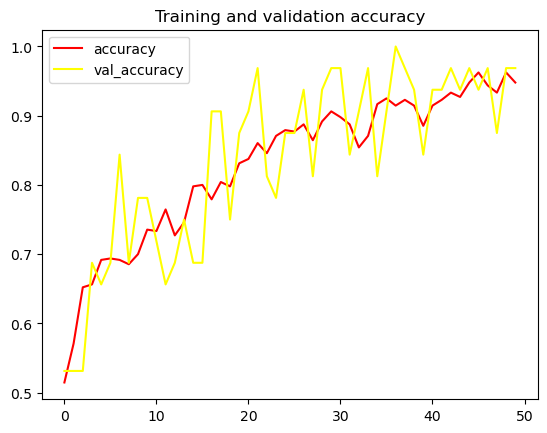

In [144]:
plt.plot(history.history['accuracy'],color='red',label="accuracy")
plt.plot(history.history['val_accuracy'],color="yellow",label="val_accuracy")
plt.title('Training and validation accuracy')
plt.legend(loc="upper left")
plt.show()

In [145]:
model.evaluate(test_ds)

3/3 [==============================] - 2s 30ms/step - loss: 0.0918 - accuracy: 0.9663


[0.09182604402303696, 0.966292142868042]

In [146]:
pred=model.predict(test_ds)


3/3 [==============================] - 2s 80ms/step


In [ ]:
min(pred)


array([0])

In [148]:
def predict(model,img):
    '''img_tensor=tf.keras.utils.load_img(img_src,target_size=(256,256))
    img_arr=tf.keras.utils.img_to_array(img_tensor)
    plt.imshow(img_arr.astype(int))
    img_arr=img_arr/255
    img_tensor_ex=np.expand_dims(img_arr,0)
    predictions=model.predict(img_tensor_ex)
    return predictions'''
    
    resize=tf.keras.utils.load_img(img,target_size=(256,256))
    #resize = tf.image.resize(img_tensor, (256,256))
    img_arr=tf.keras.utils.img_to_array(resize)
    plt.imshow(resize)  
    yhat = model.predict(np.expand_dims(img_arr/255, 0))
    if yhat > 0.5: 
        print(f'Predicted class is Sad')
    else:
        print(f'Predicted class is Happy')

In [1]:
predict(model,"pexels-photo-1999504.webp")

NameError: name 'predict' is not defined

1/1 [==============================] - 0s 31ms/step
Predicted class is Sad


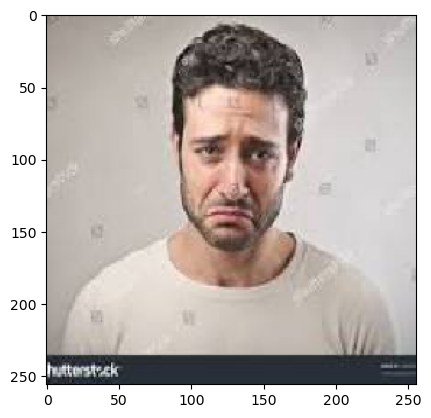

In [153]:
predict(model,"sad.jpg")

1/1 [==============================] - 0s 40ms/step
Predicted class is Sad


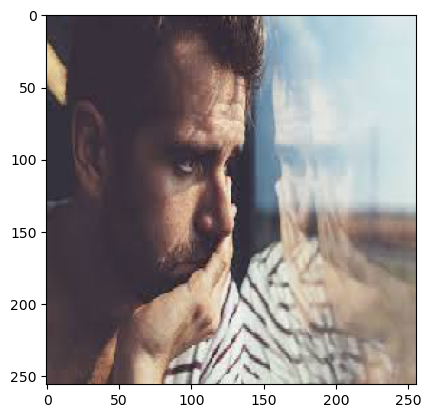

In [154]:
predict(model,"images.jpg")

1/1 [==============================] - 0s 31ms/step
Predicted class is sad


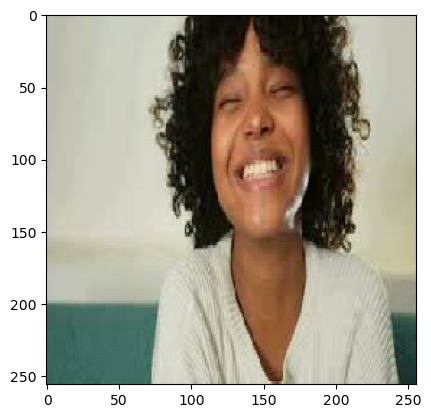

In [157]:
predict(model,"hap.jpg")

In [156]:
class_names = dataset.class_names  # e.g., ['Happy', 'Sad']

def predict(model, img_path):
    resize = tf.keras.utils.load_img(img_path, target_size=(256, 256))
    img_arr = tf.keras.utils.img_to_array(resize)
    plt.imshow(resize)
    yhat = model.predict(np.expand_dims(img_arr / 255.0, 0))
    predicted_class = class_names[int(yhat > 0.5)]
    print(f'Predicted class is {predicted_class}')
